In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

/tmp/ipython-input-2158140052.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,267.551483,270.132137,266.625994,268.672720,1963682
1,2010-01-05,267.622620,270.363456,265.736078,268.743878,2014488
2,2010-01-06,261.571259,267.747037,260.912756,267.622441,3349176
3,2010-01-07,254.292206,263.191009,253.081960,261.802787,6474892
4,2010-01-08,249.095306,255.751616,247.920669,254.861735,6048178


In [ ]:
df = df.drop(['Date'], axis = 1)
df.head()

/tmp/ipython-input-3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,267.551483,270.132137,266.625994,268.672720,1963682
1,267.622620,270.363456,265.736078,268.743878,2014488
2,261.571259,267.747037,260.912756,267.622441,3349176
3,254.292206,263.191009,253.081960,261.802787,6474892
4,249.095306,255.751616,247.920669,254.861735,6048178


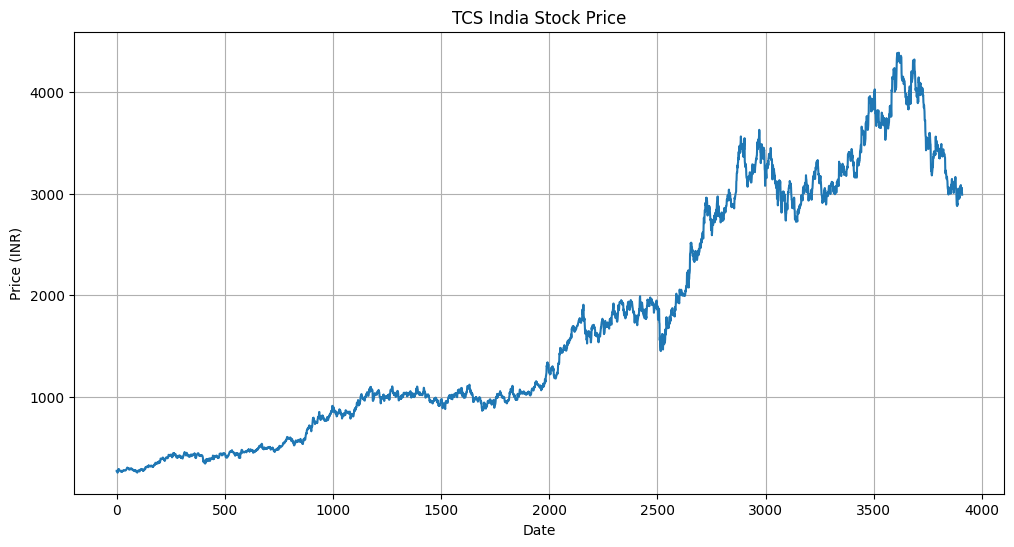

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,267.551483,270.132137,266.625994,268.672720,1963682
1,267.622620,270.363456,265.736078,268.743878,2014488
2,261.571259,267.747037,260.912756,267.622441,3349176
3,254.292206,263.191009,253.081960,261.802787,6474892
4,249.095306,255.751616,247.920669,254.861735,6048178
...,...,...,...,...,...
3905,3057.600098,3076.000000,3046.100098,3057.899902,2895420
3906,3035.300049,3063.800049,3032.800049,3049.100098,2241536
3907,3058.000000,3067.399902,3025.100098,3035.000000,1868085


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3905,3145.360955
3906,3142.111741
3907,3138.715198
3908,3134.499561


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

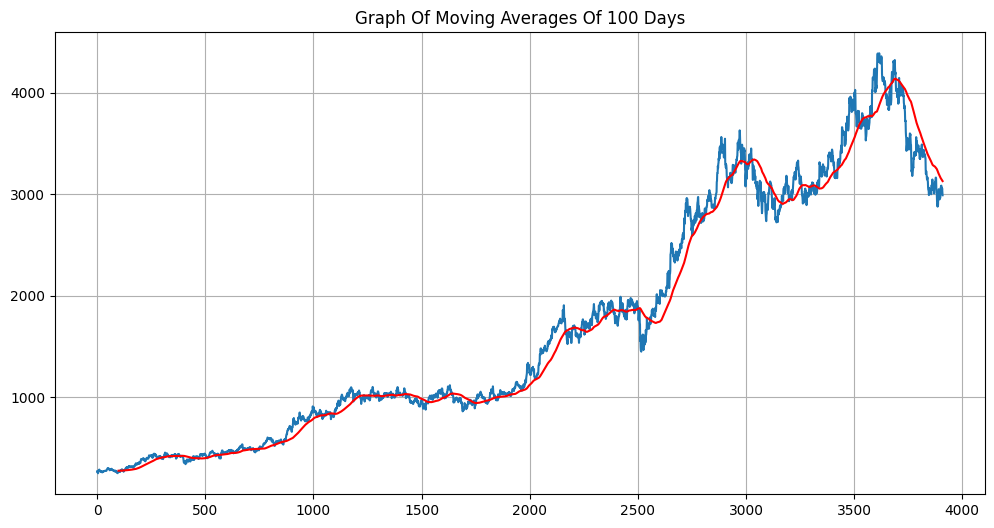

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3905,3376.794368
3906,3372.455450
3907,3367.134152
3908,3361.483882


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

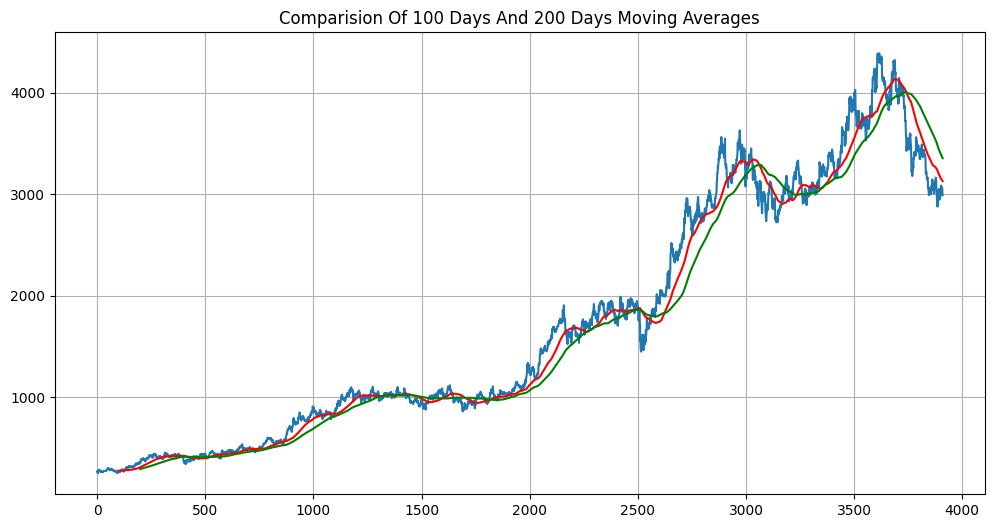

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3910, 5)

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2737, 6)
(1173, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,267.551483,270.132137,266.625994,268.672720,1963682
1,2010-01-05,267.622620,270.363456,265.736078,268.743878,2014488
2,2010-01-06,261.571259,267.747037,260.912756,267.622441,3349176
3,2010-01-07,254.292206,263.191009,253.081960,261.802787,6474892
4,2010-01-08,249.095306,255.751616,247.920669,254.861735,6048178


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2737,2021-02-05,2826.546631,2869.420014,2800.634761,2863.243986,2366135
2738,2021-02-08,2876.804443,2887.455540,2824.040628,2854.785941,2526592
2739,2021-02-09,2843.508301,2905.177898,2831.962146,2859.708930,2658751
2740,2021-02-10,2876.088623,2881.548343,2825.965398,2850.758449,2127983
2741,2021-02-11,2869.554688,2881.458997,2850.803274,2877.610206,1165882


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00666978],
       [0.00669602],
       [0.00628238],
       ...,
       [0.95544698],
       [0.96832256],
       [0.9693295 ]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2637, 100, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 29s 266ms/step - loss: 0.0459 - mean_absolute_error: 0.1483
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - loss: 0.0046 - mean_absolute_error: 0.0452
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 251ms/step - loss: 0.0046 - mean_absolute_error: 0.0448
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - loss: 0.0034 - mean_absolute_error: 0.0392
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - loss: 0.0029 - mean_absolute_error: 0.0368
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - loss: 0.0036 - mean_absolute_error: 0.0398
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 268ms/step - loss: 0.0031 - mean_absolute_error: 0.0360
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - loss: 0.0030 - mean_absolute_error: 0.0361
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - loss: 0.0028 - mean_absolute_error: 0.0350
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - loss: 0.0026 - mean_absolute_error: 0.0332
Epoch 11/

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1173, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index = True)

In [ ]:

final_df.head()

,0
0,2120.812054
1,2216.262207
2,2214.082381
3,2206.120814
4,2210.569033


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00621376],
       [0.04762516],
       [0.04667943],
       ...,
       [0.40283751],
       [0.40800032],
       [0.3961562 ]])

In [ ]:
input_data.shape

(1273, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1173, 100, 1)
(1173,)


In [ ]:
# Making predictions

y_pred = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step


In [ ]:
y_pred.shape

(1173, 1)

In [ ]:
y_test

array([0.32832054, 0.32465099, 0.32678684, ..., 0.40283751, 0.40800032,
       0.3961562 ])

In [ ]:
y_pred

array([[0.32999638],
       [0.325778  ],
       [0.32285026],
       ...,
       [0.4029197 ],
       [0.40495384],
       [0.4044875 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00043385])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

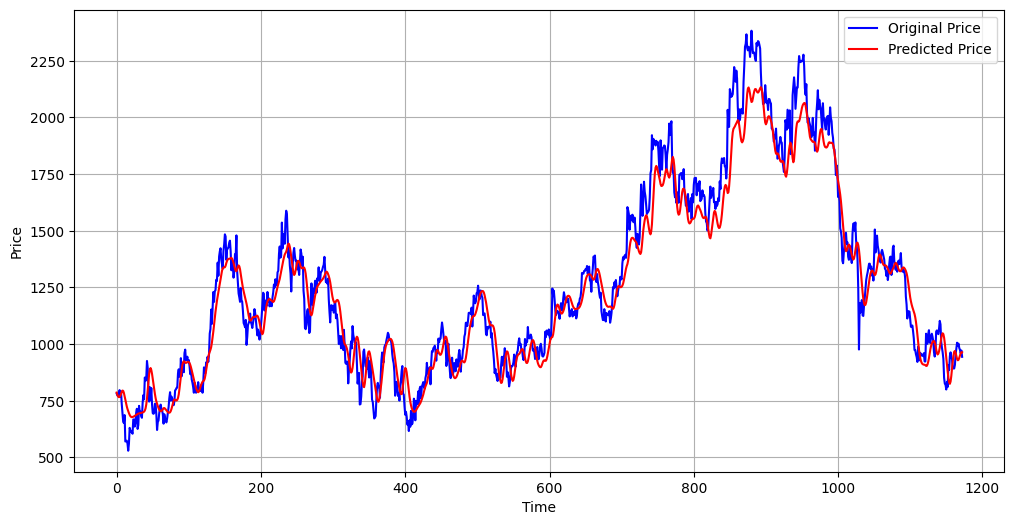

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()